In [1]:
%matplotlib inline

import os
import textwrap
import math

import datetime as dt
import pandas as pd

import matplotlib        as mpl
import matplotlib.pyplot as plt

import numpy             as np
import tables            as tb
import seaborn as sns

#import invisible_cities.core.core_functions as coref
#import invisible_cities.core.fit_functions  as fitf

from   scipy.optimize                          import curve_fit
from   scipy                                   import stats

#from   invisible_cities.io.dst_io import df_writer

# Formatting options
pd.options.display.max_columns = None
mpl.rcParams.update({'font.size': 18})
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['patch.force_edgecolor'] = False
mpl.rcParams['patch.facecolor'] = 'gray'
hargs = {'histtype': 'stepfilled', 'edgecolor': 'black', 'facecolor': 'gray'}

# Directory to which figures will be stored
save_dir = "Plots Iniciales"
ftype = "pdf"
if(not os.path.isdir(save_dir)):
    print("Creating directory",save_dir)
    os.mkdir(save_dir)

In [2]:
evtfnames_data_with_hits = [r"/Users/diego/TFG/Mis movidas de Python/ntuple_combined_7746_con_hits.h5"]


In [3]:
hits = None
for ifile,fname in enumerate(evtfnames_data_with_hits):

    print("Adding file {} ...".format(fname))

    ftbl = tb.open_file(fname, 'r')
    fhits = ftbl.root.CHITS.highTh
    
    # Read the tables into DataFrames.
    to_df = pd.DataFrame.from_records
    df_hits = to_df(fhits.read())
    
    # Concatenate with previous runs.
    if(hits is None):
        hits = df_hits
    else:
        hits = df_hits.append(df_hits)
        
    ftbl.close()
    
print("{} total events".format(len(hits['event'].values)))   


Adding file /Users/diego/TFG/Mis movidas de Python/ntuple_combined_7746_con_hits.h5 ...
33489145 total events


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
1434,135,1.578221e+09,0,78.599908,-59.025412,1,65.0,-65.0,0.0,0.0,304.345605,36.025444,755.895157,-1.0,0.003041,0,0.003041
1435,135,1.578221e+09,0,78.599908,-59.025412,1,65.0,-65.0,0.0,0.0,306.024875,39.226414,929.761572,-1.0,0.003741,0,0.003741
1436,135,1.578221e+09,0,78.599908,-59.025412,1,65.0,-55.0,0.0,0.0,306.024875,30.522615,723.460348,-1.0,0.002877,0,0.002877
1437,135,1.578221e+09,0,78.599908,-59.025412,1,85.0,-75.0,0.0,0.0,304.345605,57.682129,1210.301304,-1.0,0.004962,0,0.004962
1438,135,1.578221e+09,0,78.599908,-59.025412,1,75.0,-75.0,0.0,0.0,304.345605,47.151764,989.350470,-1.0,0.004029,0,0.004029
1439,135,1.578221e+09,0,78.599908,-59.025412,1,85.0,-75.0,0.0,0.0,306.024875,59.857704,1418.773419,-1.0,0.005818,0,0.005818
1440,135,1.578221e+09,0,78.599908,-59.025412,1,75.0,-75.0,0.0,0.0,306.024875,59.060951,1399.888434,-1.0,0.005702,0,0.005702
1441,135,1.578221e+09,0,78.599908,-59.025412,1,75.0,-55.0,0.0,0.0,302.630061,53.462654,2394.917549,-1.0,0.009627,0,0.009627
1442,135,1.578221e+09,0,78.599908,-59.025412,1,85.0,-65.0,0.0,0.0,302.630061,46.413628,2079.148766,-1.0,0.008502,0,0.008502
1443,135,1.578221e+09,0,78.599908,-59.025412,1,85.0,-55.0,0.0,0.0,302.630061,41.883812,1876.230762,-1.0,0.007669,0,0.007669


In [85]:
pd.set_option('display.max_rows', 500)
hits[hits.event == 36]

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
342,36,1.578221e+09,2,-83.485036,-70.361472,1,-75.0,-85.0,0.0,0.0,154.533878,32.749538,811.498455,-1.0,0.003095,-1,NaN
343,36,1.578221e+09,1,-61.695576,-62.853318,1,-55.0,-65.0,0.0,0.0,111.218508,37.949284,1242.935960,-1.0,0.004584,-1,NaN
344,36,1.578221e+09,0,47.615144,-105.928717,1,35.0,-105.0,0.0,0.0,48.296479,32.808693,698.789834,-1.0,0.002677,-1,NaN
345,36,1.578221e+09,0,47.615144,-105.928717,1,55.0,-135.0,0.0,0.0,48.296479,37.768425,804.426787,-1.0,0.003263,-1,NaN
346,36,1.578221e+09,0,47.615144,-105.928717,1,35.0,-115.0,0.0,0.0,48.296479,38.967278,829.961055,-1.0,0.003215,-1,NaN
347,36,1.578221e+09,0,47.615144,-105.928717,1,65.0,-105.0,0.0,0.0,48.296479,39.796860,847.630263,-1.0,0.003409,-1,NaN
348,36,1.578221e+09,0,47.615144,-105.928717,1,65.0,-105.0,0.0,0.0,50.064375,40.848297,882.283576,-1.0,0.003549,-1,NaN
349,36,1.578221e+09,0,47.615144,-105.928717,1,65.0,-105.0,0.0,0.0,51.896924,31.963661,691.637155,-1.0,0.002782,-1,NaN
350,36,1.578221e+09,0,47.615144,-105.928717,1,45.0,-125.0,0.0,0.0,46.697253,85.278854,2446.126246,-1.0,0.009657,0,0.009657
351,36,1.578221e+09,0,47.615144,-105.928717,1,45.0,-125.0,0.0,0.0,48.296479,153.982224,3279.655567,-1.0,0.012950,0,0.012950


# Fancy Plotting

Intentamos visualizar como aparecen los hits de la traza de estos eventos con 2 un pulsos S2 y una sola traza. Para eso hacemos un plot en 2 y 3 dimensiones de las posiciones absolutas de estos hits; podemos visualizarlo en comparación con toda la cámara o una vista local del plot.

In [83]:
def fancy_plotting(event, ycoord, vista, alpha): 
    
    plt.figure(1)
    plt.scatter(event['X'], event[ycoord], s=event['E'], alpha=alpha)
    plt.xlabel('X (mm)')
    plt.ylabel(ycoord + ' (mm)')
    plt.title('Vista en modo {}'.format(vista))
    if vista == 'camara':
        if ycoord == 'Y':
            plt.xlim([-200, 200])
            plt.ylim([-200, 200])
            
        elif ycoord == 'Z':
            plt.xlim([-200, 200])
            plt.ylim([0, 500])
            
    elif vista == 'local':
        pass
    
    return plt.figure(1)

Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)


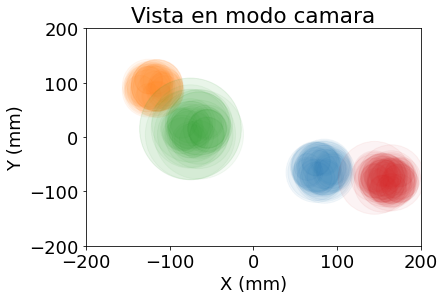

In [84]:
print(fancy_plotting(hits[hits.event == 135], 'Y', 'camara', 0.05))
print(fancy_plotting(hits[hits.event == 138], 'Y', 'camara', 0.05))
print(fancy_plotting(hits[hits.event == 9557], 'Y', 'camara', 0.05))
print(fancy_plotting(hits[hits.event == 133322], 'Y', 'camara', 0.05))

Figure(432x288)


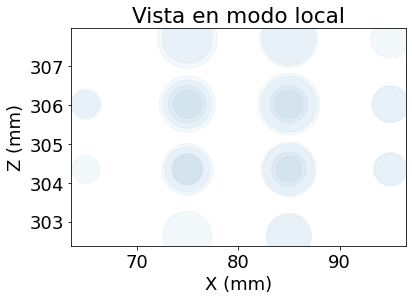

In [10]:
print(fancy_plotting(hits[hits.event == 135], 'Z', 'local', 0.05))
#print(fancy_plotting(hits[hits.event == 138], 'Z', 'camara', 0.05))
#print(fancy_plotting(hits[hits.event == 9557], 'Z', 'camara', 0.05))
#print(fancy_plotting(hits[hits.event == 133322], 'Z', 'camara', 0.05))

In [11]:
from mpl_toolkits import mplot3d
def fancy_plotting_3D(event, vista, alpha): 
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(event['X'], event['Y'], event['Z'], s=event['E'], alpha=alpha) 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z');
    ax.set_title('Vista en modo {}'.format(vista))
    
    if vista == 'camara':
        ax.set_xlim([-200, 200])
        ax.set_ylim([-200, 200])
        ax.set_zlim([0, 500])
            
    elif vista == 'local':
        ax.set_xlim([60, 98])
        ax.set_ylim([-80, -40])
        ax.set_zlim([301, 310])
            
    
    return plt.figure(1)

Figure(432x288)


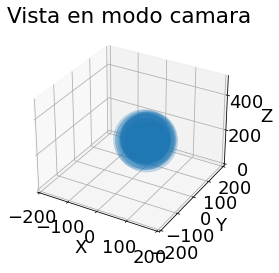

In [13]:
#%matplotlib notebook
print(fancy_plotting_3D(hits[hits.event == 135], 'camara', 0.2))
#print(fancy_plotting_3D(hits[hits.event == 138], 'camara', 0.2))

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
374,36,1.578221e+09,0,47.615144,-105.928717,1,55.0,-95.0,0.0,0.0,48.296479,32.121521,684.153812,-1.0,0.002651,0,0.002651
365,36,1.578221e+09,0,47.615144,-105.928717,1,55.0,-125.0,0.0,0.0,51.896924,86.958046,1881.618477,-1.0,0.007497,0,0.007497
366,36,1.578221e+09,0,47.615144,-105.928717,1,55.0,-125.0,0.0,0.0,53.570186,47.245842,1318.244200,-1.0,0.005254,0,0.005254
367,36,1.578221e+09,0,47.615144,-105.928717,1,55.0,-115.0,0.0,0.0,46.697253,196.484650,5635.937091,-1.0,0.022132,0,0.022132
368,36,1.578221e+09,0,47.615144,-105.928717,1,55.0,-115.0,0.0,0.0,48.296479,469.748169,10005.130216,-1.0,0.039299,0,0.039299
369,36,1.578221e+09,0,47.615144,-105.928717,1,55.0,-115.0,0.0,0.0,50.064375,448.493683,9687.028304,-1.0,0.038059,0,0.038059
370,36,1.578221e+09,0,47.615144,-105.928717,1,55.0,-115.0,0.0,0.0,51.896924,269.920105,5840.594177,-1.0,0.022953,0,0.022953
371,36,1.578221e+09,0,47.615144,-105.928717,1,55.0,-115.0,0.0,0.0,53.570186,137.019836,3823.100555,-1.0,0.015028,0,0.015028
372,36,1.578221e+09,0,47.615144,-105.928717,1,55.0,-105.0,0.0,0.0,46.697253,46.141258,1323.509135,-1.0,0.005184,0,0.005184
364,36,1.578221e+09,0,47.615144,-105.928717,1,55.0,-125.0,0.0,0.0,50.064375,225.483551,4870.225879,-1.0,0.019401,0,0.019401


# Fancy Plotting Improved: Super Fancy Plotting

Definimos unha función que nos axude a visualizar como se reparten os hits dun evento concreto ao longo da cámara onde se leva a cabo o experimento. Para iso, facemos un plot onde podemos ver (vista cámara ou local) os hits repartidos e superpostos, onde maior radio significa maior enerxía do hit. 

En canto á función en sí, esta toma 7 argumentos:
- event: Número de evento que queremos analizar, pode tomar calquera integer que forme parte do conxunto de eventos
- ycoord: Coordenada do eixo Y dos nosos plots, pode tomar argumento 'Y' ou 'Z', sempre string
- vista: Tipo de vista que queremos ter, pode tomar argumento 'Ycamara' ou 'local', sempre string
- alpha: Como os hits están superpostos, necesitamos que os puntos non sexan opacos completamente [0, 1.0]
- S2_pulse: Toma un integer entre 0 e n sendo n o número de pulsos S2 do evento. Está relacionado con *npeak* no dataframe e selecciona o pulso S2 do evento que queremos observar(1)
- track_id: Toma un integer entre 0 e n sendo n o número de trazas do evento. Está relacionado con *track_id* no dataframe e selecciona a traza do evento que queremos observar*
- xcoord: prefixada a X, é a coordenada do eixo X dos nosos plots

(1): son argumentos opcionales que veñen prefixados a 0 porque os evento con 1 S2 e 1 traza terán *npeak == track_id == 0*

In [79]:
def super_fancy_plotting(event, ycoord, vista, alpha, S2_pulse=0, track_id=0, xcoord='X'): 
    
    plt.figure(1)
    plt.scatter(hits[(hits.event == event) & (hits.npeak == S2_pulse) & (hits.track_id == track_id)][xcoord], 
                hits[(hits.event == event) & (hits.npeak == S2_pulse) & (hits.track_id == track_id)][ycoord], 
                s=hits[(hits.event == event) & (hits.npeak == S2_pulse) & (hits.track_id == track_id)]['E'], 
                alpha=alpha)
    plt.xlabel('X (mm)')
    plt.ylabel(ycoord + ' (mm)')
    plt.title('Vista en modo {}'.format(vista))
    if vista == 'camara':
        if ycoord == 'Y':
            plt.xlim([-200, 200])
            plt.ylim([-200, 200])
            
        elif ycoord == 'Z':
            plt.xlim([-200, 200])
            plt.ylim([0, 500])
                
    elif vista == 'local':
        pass
    
    return plt.figure(1)

Figure(432x288)


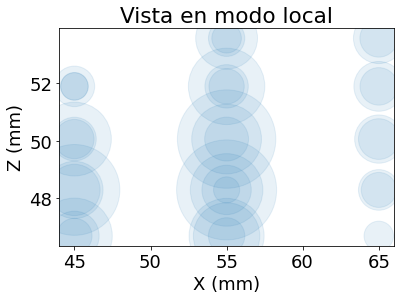

In [82]:
print(super_fancy_plotting(36, 'Z', 'local', 0.1))